In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import KFold, cross_val_score

from sklearn import metrics
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

import joblib

C:\Users\rhamn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_url = 'G:\Meu Drive\PESSOAL\#_ACADÊMICO\#_PROJETO\Aprendizado Supervisionado - REDWINE\winequalityN.csv'

In [3]:
dados = pd.read_csv(df_url)

In [4]:
dados.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
dados['type'].unique()

array(['white', 'red'], dtype=object)

In [6]:
white_wine = dados[dados['type'] == 'white']

In [7]:
white_wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Variáveis discretas: ['free sulfur dioxide','total sulfur dioxide','opinion']

Variáveis categóricas: ['type','opinion']

Variáveis contínuas: ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar', 'chlorides', 'density', 'pH', 'sulphates', 'alcohol']

In [8]:
if 'quality' in white_wine.columns:
    white_wine.loc[:, 'opinion'] = 0
    white_wine.loc[:, 'opinion'] = white_wine['quality'].apply(lambda x: 0 if x <= 5 else 1)
else:
    print("The 'quality' column is not present in the DataFrame.")

white_wine.head()

C:\Users\rhamn\AppData\Local\Temp\ipykernel_39492\2965560660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_wine.loc[:, 'opinion'] = 0


,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [9]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4898 entries, 0 to 4897
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4898 non-null   object 
 1   fixed acidity         4890 non-null   float64
 2   volatile acidity      4891 non-null   float64
 3   citric acid           4896 non-null   float64
 4   residual sugar        4896 non-null   float64
 5   chlorides             4896 non-null   float64
 6   free sulfur dioxide   4898 non-null   float64
 7   total sulfur dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4891 non-null   float64
 10  sulphates             4896 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
 13  opinion               4898 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 574.0+ KB


In [10]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,opinion
count,4890.000000,4891.000000,4896.000000,4896.000000,4896.000000,4898.000000,4898.000000,4898.000000,4891.000000,4896.000000,4898.000000,4898.000000,4898.000000
mean,6.855532,0.278252,0.334250,6.393250,0.045778,35.308085,138.360657,0.994027,3.188203,0.489835,10.514267,5.877909,0.665169
std,0.843808,0.100811,0.120985,5.072275,0.021850,17.007137,42.498065,0.002991,0.151014,0.114147,1.230621,0.885639,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000,1.000000


In [11]:
white_wine_f = white_wine.notna().all(axis=1)
resultado_filtro = white_wine[white_wine_f]

In [12]:
X = resultado_filtro[['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide']]
y = resultado_filtro['opinion']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.30, random_state= 42, stratify= y)

In [14]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
k_folds = KFold(n_splits= 10)

In [16]:

def avg_kfold_cv(model, X_train, y_train, k_folds):
    
    scores_acc = cross_val_score(model, X_train, y_train, cv = k_folds, scoring= make_scorer(accuracy_score))

    print("\nCross Validation Scores - Accuracy: ", scores_acc)
    print("Média CV Score - Accuracy: ", scores_acc.mean())

    scores_pre = cross_val_score(model, X_train, y_train, cv = k_folds, scoring= make_scorer(precision_score))

    print("\nCross Validation Scores - Precision: ", scores_pre)
    print("Média CV Score - Precision: ", scores_pre.mean())

    scores_rec = cross_val_score(model, X_train, y_train, cv = k_folds, scoring= make_scorer(recall_score))

    print("\nCross Validation Scores - Recall: ", scores_rec)
    print("Média CV Score - Recall: ", scores_rec.mean())

    scores_f1 = cross_val_score(model, X_train, y_train, cv = k_folds, scoring= make_scorer(f1_score))

    print("\nCross Validation Scores - f1 Score: ", scores_f1)
    print("Média CV Score - f1 Score: ", scores_f1.mean())

In [17]:
lr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [18]:
joblib.dump(lr,'lrarq.joblib')

['lrarq.joblib']

In [19]:
mod_carreg = joblib.load('lrarq.joblib')

In [20]:
yhat = lr.predict(X_test)

In [21]:
print("Accuracy Test:",metrics.accuracy_score(y_test, yhat))
print("Precision Test:",metrics.precision_score(y_test,yhat))
print("Recall Test:",metrics.recall_score(y_test,yhat))
print("f1-score Test:",metrics.f1_score(y_test,yhat, average='weighted'))

Accuracy Test: 0.6960985626283368
Precision Test: 0.7082018927444795
Recall Test: 0.9238683127572016
f1-score Test: 0.6502284792110585


In [22]:
result_lr = avg_kfold_cv(lr, X_train, y_train, k_folds)


Cross Validation Scores - Accuracy:  [0.66568915 0.71847507 0.69794721 0.68328446 0.6686217  0.68328446
 0.73900293 0.68035191 0.70967742 0.68823529]
Média CV Score - Accuracy:  0.6934569604968088

Cross Validation Scores - Precision:  [0.67449664 0.73489933 0.70934256 0.69204152 0.71119134 0.69624573
 0.7716263  0.68770764 0.71283784 0.69636964]
Média CV Score - Precision:  0.7086758539303216

Cross Validation Scores - Recall:  [0.92201835 0.9279661  0.91517857 0.91324201 0.85652174 0.91479821
 0.90650407 0.93243243 0.93777778 0.93777778]
Média CV Score - Recall:  0.9164217029316859

Cross Validation Scores - f1 Score:  [0.77906977 0.82022472 0.79922027 0.78740157 0.77712032 0.79069767
 0.83364486 0.791587   0.80998081 0.79924242]
Média CV Score - f1 Score:  0.7988189412536573


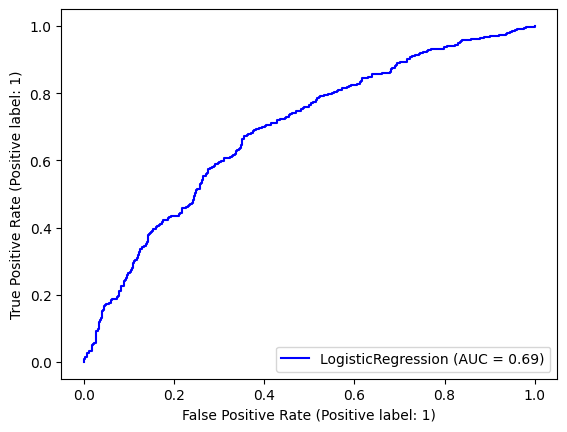

In [23]:
RocCurveDisplay.from_estimator(lr, X_test, y_test, color="blue")
plt.show()

In [24]:
dTree = DecisionTreeClassifier(criterion="entropy", min_samples_leaf= 50).fit(X_train,y_train)

In [25]:
yhat = dTree.predict(X_test)

In [26]:
print("Accuracy Test:",metrics.accuracy_score(y_test, yhat))
print("Precision Test:",metrics.precision_score(y_test,yhat))
print("Recall Test:",metrics.recall_score(y_test,yhat))
print("f1-score Test:",metrics.f1_score(y_test,yhat, average='weighted'))

Accuracy Test: 0.7186858316221766
Precision Test: 0.7475728155339806
Recall Test: 0.8713991769547325
f1-score Test: 0.7017257010046364


In [27]:
result_dTree = avg_kfold_cv(dTree, X_train, y_train, k_folds)


Cross Validation Scores - Accuracy:  [0.71554252 0.73313783 0.70967742 0.73020528 0.71260997 0.70967742
 0.72140762 0.70087977 0.74193548 0.73529412]
Média CV Score - Accuracy:  0.721036743143005

Cross Validation Scores - Precision:  [0.74103586 0.7756654  0.76150628 0.75918367 0.7704918  0.75619835
 0.79377432 0.77272727 0.78902954 0.75665399]
Média CV Score - Precision:  0.7676266475873228

Cross Validation Scores - Recall:  [0.85321101 0.86440678 0.8125     0.84931507 0.8173913  0.8206278
 0.82926829 0.76576577 0.83111111 0.88444444]
Média CV Score - Recall:  0.8328041578371137

Cross Validation Scores - f1 Score:  [0.79317697 0.81763527 0.78617711 0.80172414 0.79324895 0.78709677
 0.8111332  0.76923077 0.80952381 0.81557377]
Média CV Score - f1 Score:  0.7984520755967939


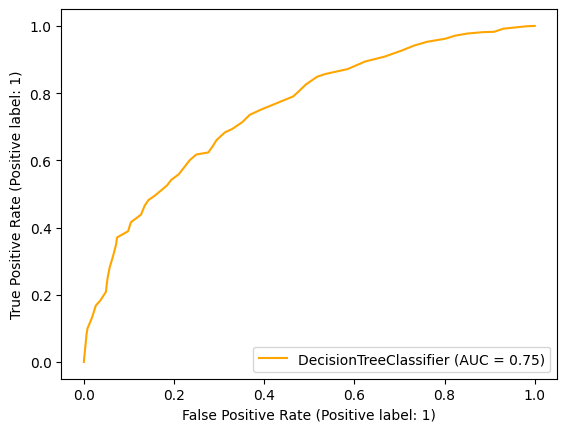

In [28]:
RocCurveDisplay.from_estimator(dTree, X_test, y_test, color='orange')
plt.show()

In [29]:
SVM_met = svm.SVC(kernel='rbf').fit(X_train, y_train)

In [30]:
yhat = SVM_met.predict(X_test)

In [31]:
print("Accuracy Test:",metrics.accuracy_score(y_test, yhat))
print("Precision Test:",metrics.precision_score(y_test,yhat))
print("Recall Test:",metrics.recall_score(y_test,yhat))
print("f1-score Test:",metrics.f1_score(y_test,yhat, average='weighted'))

Accuracy Test: 0.7535934291581109
Precision Test: 0.7727272727272727
Recall Test: 0.8919753086419753
f1-score Test: 0.7400994436385002


In [32]:
result_SVM = avg_kfold_cv(SVM_met, X_train, y_train, k_folds)


Cross Validation Scores - Accuracy:  [0.69208211 0.76832845 0.75659824 0.73020528 0.73313783 0.74193548
 0.76832845 0.74193548 0.7888563  0.77058824]
Média CV Score - Accuracy:  0.7491995859927549

Cross Validation Scores - Precision:  [0.7148289  0.78136201 0.77865613 0.75098814 0.77470356 0.76061776
 0.83266932 0.76587302 0.8122449  0.7816092 ]
Média CV Score - Precision:  0.7753552923155241

Cross Validation Scores - Recall:  [0.86238532 0.92372881 0.87946429 0.86757991 0.85217391 0.88340807
 0.8495935  0.86936937 0.88444444 0.90666667]
Média CV Score - Recall:  0.877881429025812

Cross Validation Scores - f1 Score:  [0.78170478 0.84660194 0.82599581 0.80508475 0.8115942  0.81742739
 0.84104628 0.81434599 0.84680851 0.83950617]
Média CV Score - f1 Score:  0.8230115817838597


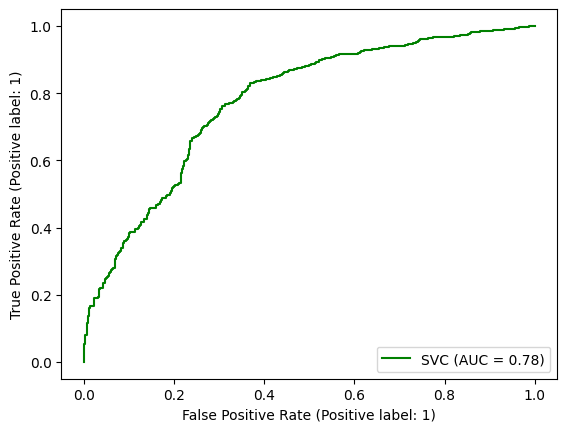

In [33]:
RocCurveDisplay.from_estimator(SVM_met, X_test, y_test, color='green')
plt.show()

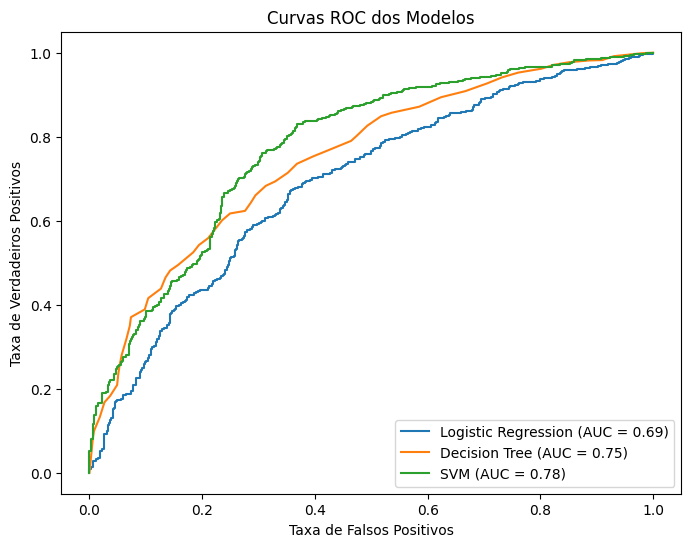

In [34]:
# FUNÇÃO PARA PLATAGEM DA CURVA ROC

def plot_roc_curve(fpr, tpr, auc, label):
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

# PLOTAGEM DAS CURVAS ROC

plt.figure(figsize=(8, 6))

# LOGISTIC REGRESSION

fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_proba(X_test)[:, 1])
roc_auc_lr = auc(fpr_lr, tpr_lr)
plot_roc_curve(fpr_lr, tpr_lr, roc_auc_lr, label='Logistic Regression')

# DECISION TREE

fpr_dt, tpr_dt, _ = roc_curve(y_test, dTree.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)
plot_roc_curve(fpr_dt, tpr_dt, roc_auc_dt, label='Decision Tree')

# SVM

fpr_svm, tpr_svm, _ = roc_curve(y_test, SVM_met.decision_function(X_test))
roc_auc_svm = auc(fpr_svm, tpr_svm)
plot_roc_curve(fpr_svm, tpr_svm, roc_auc_svm, label='SVM')


plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curvas ROC dos Modelos')
plt.legend(loc='lower right')
plt.show()